In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import glob
import os
%matplotlib inline

In [74]:
os.getcwd()

'/Users/annalisasheehan/Documents/PhD/Costa Rica/Arduino_Data'

## Read in PM dataset which contains calibration data 

In [3]:
Arduino2 = pd.read_csv("After Calibration/cr_sensor_2_calib.txt",delimiter=',', 
                       names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds', 'PM1', 'PM2.5', 'PM10', 
                              'Temp', 'Pressure', 'Humidity', 'VOC'],)

In [68]:
Arduino2[Arduino2.Month == 4]

,Year,Month,Day,Hour,Minute,Seconds,PM1,PM2.5,PM10,Temp,Pressure,Humidity,VOC
37095,2019,4,10,9,15,44,7,12,16,12.25,1017.20,48.49,0.00
37096,2019,4,10,9,15,49,8,13,15,12.24,1017.20,48.95,3.21
37097,2019,4,10,9,15,55,8,13,18,12.23,1017.18,49.29,4.14
37098,2019,4,10,9,16,0,7,14,17,12.21,1017.18,49.52,5.17
37099,2019,4,10,9,16,5,6,12,15,12.17,1017.18,49.69,6.21
37100,2019,4,10,9,16,10,6,10,15,12.10,1017.18,49.81,7.37
37101,2019,4,10,9,16,16,5,8,8,12.01,1017.22,49.92,8.48
37102,2019,4,10,9,16,21,5,8,8,11.94,1017.22,50.14,9.68
37103,2019,4,10,9,16,26,7,9,9,11.88,1017.26,50.41,10.89
37104,2019,4,10,9,16,31,8,11,11,11.80,1017.24,50.60,12.10


In [5]:
A2_mean = Arduino2.groupby(['Year','Month','Day', 'Hour'], as_index=False).mean()

In [7]:
A2_mean = A2_mean.rename(columns={'PM1':'A2_PM1','PM2.5':'A2_PM2.5',
                                  'PM10':'A2_PM10','Temp':'A2_Temp',
                                  'Pressure':'A2_Pressure','Humidity':'A2_Humidity',
                                  'VOC':'A2_VOC'})

In [41]:
A2_mean['Datetime']  = (pd.to_datetime(A2_mean['Year'].astype(str) + '-' +
                                       A2_mean['Month'].astype(str) + '-' +
                                       A2_mean['Day'].astype(str) + ' ' +
                                       A2_mean['Hour'].astype(str)+ ':'+ 
                                       A2_mean['Minute'].astype(str), errors='coerce'))

## Read in data which stopped working on the 16/3/2019

In [8]:
Arduino3_p = pd.read_csv("cr_sensor_03.csv")

In [8]:
#Arduino3_p = pd.read_csv('cr_sensor_03.csv',delimiter=',',
                #        names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds','PM1','PM2.5','PM10'])

In [10]:
A3_mean = Arduino3_p.groupby(['Year','Month','Day', 'Hour'], as_index=False).mean()

In [44]:
A3_mean

,Year,Month,Day,Hour,Minute,Second,A3_PM1,A3_PM2.5,A3_PM10,Datetime
0,2019,3,16,4,11.020833,30.520833,5.9375,9.166667,9.729167,2019-03-16 04:11:01


In [12]:
A3_mean = A3_mean.rename(columns={'PM1':'A3_PM1','PM2.5':'A3_PM2.5',
                                  'PM10':'A3_PM10'})

In [43]:
A3_mean['Datetime']  = (pd.to_datetime(A3_mean['Year'].astype(str) + '-' +
                                       A3_mean['Month'].astype(str) + '-' +
                                       A3_mean['Day'].astype(str) + ' ' +
                                       A3_mean['Hour'].astype(str)+ ':'+ 
                                       A3_mean['Minute'].astype(str), errors='coerce'))

In [14]:
## Left join didn't work because both monitors did not collect data at the same time/day
# Test = pd.merge(A2_mean, A3_mean, how = 'left', left_on=['Year', 'Month', 'Day', 'Hour', 'Minute'], right_on=['Year', 'Month', 'Day', 'Hour', 'Minute'])

In [45]:
# Outer join because of different dates and times of arduino data 
A2_A3 = pd.merge(A2_mean, A3_mean, how = 'outer', left_on=['Year', 'Month', 'Day', 'Hour'], right_on=['Year', 'Month', 'Day', 'Hour'])

In [ ]:
#list(A2_mean.index.values)

In [15]:
Arduino4_p = pd.read_csv("cr_sensor_04.csv")

In [21]:
list(Arduino4_p)

['Year',
 'date.time',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Second',
 'PM1',
 'PM2.5',
 'PM10',
 'Temp',
 'Pressure',
 'Humidity',
 'VOC']

In [17]:
Arduino4_p = Arduino4_p[['Year','Month','Day','Hour','Minute','Second','PM1','PM2.5',
                         'PM10','Temp','Pressure','Humidity','VOC']]

In [18]:
A4_mean = Arduino4_p.groupby(['Year','Month','Day', 'Hour'], as_index=False).mean()

In [20]:
A4_mean = A4_mean.rename(columns={'PM1':'A4_PM1','PM2.5':'A4_PM2.5',
                                  'PM10':'A4_PM10','Temp':'A4_Temp',
                                  'Pressure':'A4_Pressure','Humidity':'A4_Humidity',
                                  'VOC':'A4_VOC'})

In [39]:
A4_mean['Datetime']  = (pd.to_datetime(A4_mean['Year'].astype(str) + '-' +
                                       A4_mean['Month'].astype(str) + '-' +
                                       A4_mean['Day'].astype(str) + ' ' +
                                       A4_mean['Hour'].astype(str)+ ':'+ 
                                       A4_mean['Minute'].astype(str), errors='coerce'))

In [47]:
A2_A3_A4 = pd.merge(A2_A3, A4_mean, how = 'outer', left_on=['Year', 'Month', 'Day', 'Hour'], right_on=['Year', 'Month', 'Day', 'Hour'])

In [22]:
#PM_sensors = A2_mean.join(A3_mean, on=['Year', 'Month', 'Day', 'Hour', 'Minute'])

In [49]:
# Error checking 
A2_A3_A4 = A2_A3_A4[A2_A3_A4.Hour <24]
A2_A3_A4 = A2_A3_A4[A2_A3_A4.Year >2018]

In [31]:
A2_A3_A4['Datetime']  = (pd.to_datetime(A2_A3_A4['Year'].astype(str) + '-' +
                                        A2_A3_A4['Month'].astype(str) + '-' +
                                        A2_A3_A4['Day'].astype(str) + ' ' +
                                        A2_A3_A4['Hour'].astype(str)+ ':'+ 
                                        A2_A3_A4['Minute'].astype(str), errors='coerce'))

In [54]:
A2_A3_A4['Datetime'] = A2_A3_A4['Datetime'].fillna(A2_A3_A4['Datetime_x'])

In [56]:
A2_A3_A4['Datetime'] = A2_A3_A4['Datetime'].fillna(A2_A3_A4['Datetime_y'])

In [57]:
# Order by date
A2_A3_A4 = A2_A3_A4.sort_values(['Datetime'])

In [59]:
list(A2_A3_A4)

['Year',
 'Month',
 'Day',
 'Hour',
 'Minute_x',
 'Seconds',
 'A2_PM1',
 'A2_PM2.5',
 'A2_PM10',
 'A2_Temp',
 'A2_Pressure',
 'A2_Humidity',
 'A2_VOC',
 'Datetime_x',
 'Minute_y',
 'Second_x',
 'A3_PM1',
 'A3_PM2.5',
 'A3_PM10',
 'Datetime_y',
 'Minute',
 'Second_y',
 'A4_PM1',
 'A4_PM2.5',
 'A4_PM10',
 'A4_Temp',
 'A4_Pressure',
 'A4_Humidity',
 'A4_VOC',
 'Datetime']

In [60]:
A2_A3_A4 = A2_A3_A4[['Year', 'Month', 'Day', 'Hour', 'Minute',
                     'A2_PM1', 'A2_PM2.5', 'A2_PM10', 'A2_Temp', 
                     'A2_Pressure', 'A2_Humidity', 'A2_VOC',
                     'A3_PM1', 'A3_PM2.5', 'A3_PM10', 'A4_PM1',
                     'A4_PM2.5', 'A4_PM10', 'A4_Temp', 'A4_Pressure',
                     'A4_Humidity', 'A4_VOC', 'Datetime', 'Datetime_x', 'Datetime_y']]

In [61]:
A2_A3_A4.dtypes

Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Minute                float64
A2_PM1                float64
A2_PM2.5              float64
A2_PM10               float64
A2_Temp               float64
A2_Pressure           float64
A2_Humidity           float64
A2_VOC                float64
A3_PM1                float64
A3_PM2.5              float64
A3_PM10               float64
A4_PM1                float64
A4_PM2.5              float64
A4_PM10               float64
A4_Temp               float64
A4_Pressure           float64
A4_Humidity           float64
A4_VOC                float64
Datetime       datetime64[ns]
Datetime_x     datetime64[ns]
Datetime_y     datetime64[ns]
dtype: object

In [66]:
# Calculate the offset using the calibration data 
# Subset the data into costa rica and calibration 
A2_3_4_Costa = A2_A3_A4[A2_A3_A4.Month <4]
A2_3_4_Calib = A2_A3_A4[A2_A3_A4.Month == 4]

In [64]:
A2_3_4_Costa.to_csv('A2_3_4_Costa.csv')
A2_3_4_Calib.to_csv('A2_3_4_Calib.csv')

In [69]:
list(A2_3_4_Calib)

['Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'A2_PM1',
 'A2_PM2.5',
 'A2_PM10',
 'A2_Temp',
 'A2_Pressure',
 'A2_Humidity',
 'A2_VOC',
 'A3_PM1',
 'A3_PM2.5',
 'A3_PM10',
 'A4_PM1',
 'A4_PM2.5',
 'A4_PM10',
 'A4_Temp',
 'A4_Pressure',
 'A4_Humidity',
 'A4_VOC',
 'Datetime',
 'Datetime_x',
 'Datetime_y']

In [72]:
A2_3_4_Calib = A2_3_4_Calib[['Year', 'Month', 'Day', 'Hour', 'Minute','A2_PM1', 'A2_PM2.5', 'A2_PM10', 'A2_Temp', 
                             'A2_Pressure', 'A2_Humidity', 'A2_VOC', 'Datetime']]

In [120]:
A2_3_4_Calib['Time']= '09:00:00'

/Users/annalisasheehan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [112]:
# Read in PM data from Marylebone road
Marylebone_PM = pd.read_csv("/Users/annalisasheehan/Documents/PhD/Costa Rica/Marylebone/Marylebone_road_PM_hourly.csv", delimiter=',')


In [113]:
Marylebone_PM = Marylebone_PM[Marylebone_PM.Time == '09:00:00']

In [123]:
PM_val = pd.merge(A2_3_4_Calib, Marylebone_PM, how = 'outer', left_on=['Time'], right_on=['Time'])

In [125]:
PM_val.to_csv('PM_validation.csv')

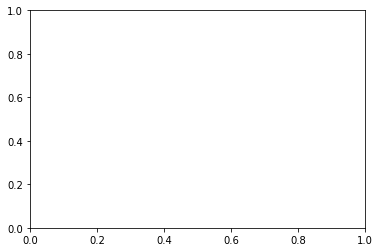

In [143]:
fig = plt.figure(); ax= fig.add_subplot(1,1,1)#; plt.ylim([0,100])

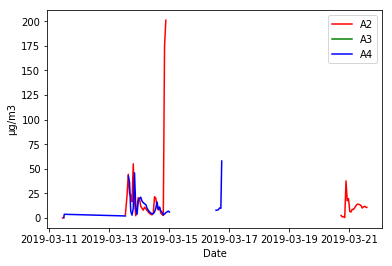

In [146]:
fig = plt.figure(); ax= fig.add_subplot(1,1,1)#; plt.ylim([0,100])
ax.plot(A2_3_4_Costa.Datetime.astype('O') ,A2_3_4_Costa.A2_PM10, color='r',label = 'A2')
ax.plot(A2_3_4_Costa.Datetime.astype('O') ,A2_3_4_Costa.A3_PM10, color='g',label = 'A3')
ax.plot(A2_3_4_Costa.Datetime.astype('O') ,A2_3_4_Costa.A4_PM10, color='b',label = 'A4')
ax.legend(loc = 'best')
ax.set_xlabel('Date')
ax.set_ylabel('μg/m3')
plt.show()

In [147]:
fig.savefig('A2A3A4_costaRica.png')

## Other sensors which have calibration

In [119]:
Arduino6 = pd.read_csv("After Calibration/cr_sensor_6_calib.txt",delimiter=',',
                       names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds','Temp', 'Pressure', 'Humidity', 'VOC'
                              ,'SO2_1','SO2_2','NO2_1','NO2_2'])

In [120]:
Arduino6

,Year,Month,Day,Hour,Minute,Seconds,Temp,Pressure,Humidity,VOC,SO2_1,SO2_2,NO2_1,NO2_2
0,2019,3,11,13,27,3,22.15,1026.28,24.42,0.00,32767.00,32767.00,-3887.0,-4567.00
1,2019,3,11,13,27,8,22.16,1026.26,24.28,6.14,32767.00,32767.00,-2194.0,-4298.00
2,2019,3,11,13,27,13,22.18,1026.26,24.07,8.81,32767.00,32767.00,-1972.0,-3881.00
3,2019,3,11,13,27,18,22.20,1026.26,23.87,11.67,32767.00,32767.00,-1877.0,-3160.00
4,2019,3,11,13,27,23,22.22,1026.28,23.77,14.51,32767.00,32767.00,-1816.0,-2666.00
5,2019,3,11,13,27,28,22.23,1026.28,23.84,17.64,32767.00,32767.00,-1775.0,-2255.00
6,2019,3,11,13,27,33,22.25,1026.28,23.84,20.84,32767.00,32767.00,-2079.0,-4498.00
7,2019,3,11,13,27,38,22.27,1026.30,23.82,23.95,24157.00,32767.00,-2009.0,-4256.00
8,2019,3,11,13,27,43,22.28,1026.28,23.80,26.96,13932.00,32767.00,-1956.0,-3991.00
9,2019,3,11,13,27,48,22.30,1026.30,23.67,30.21,7423.00,32767.00,-1906.0,-3748.00


In [121]:
Arduino6['Datetime']  = (pd.to_datetime(Arduino6['Year'].astype(str) + '-' +
                                  Arduino6['Month'].astype(str) + '-' +
                                  Arduino6['Day'].astype(str) + ' ' +
                                  Arduino6['Hour'].astype(str)+ ':'+
                                        Arduino6['Minute'].astype(str) +':'+
                                        Arduino6['Seconds'].astype(str)))

In [122]:
#Aux V = SO2_1
# Use the offset value which is found through the calibration of the
# arduino at the monitoring site Bruce said that this was 0.26 from 
#looking at the data but doesn't make sense as how do i include 
#data from marylebone actual equipment?!

#Arduino6['aux-off V'] = Arduino6['SO2_1'- offset ]
Arduino6['SO2aux-off V'] = Arduino6['SO2_1'] #- offset ]
Arduino6['NO2aux-off V'] = Arduino6['NO2_1'] #- offset ]

In [123]:
#Create a new variable for the voltage reading. Calculate the variable 
#through subtracting the adjusted baseline value from the measurement value

Arduino6['SO2V_reading'] = Arduino6['SO2_2']- Arduino6['SO2aux-off V']
Arduino6['NO2V_reading'] = Arduino6['NO2_2']- Arduino6['NO2aux-off V']

In [124]:
#Convert the voltage reading into ppb using the WE sensitivity values 
#provided by the manufacturer, in this case it's 0.3 for SO2 and 0.232 for NO2
#Arduino6['ppb'] = ['V reading'*1000/ sensitivity]

Arduino6['S02ppb'] = Arduino6['SO2V_reading'].apply(lambda x: x*1000/0.3)
Arduino6['N02ppb'] = Arduino6['NO2V_reading'].apply(lambda x: x*1000/0.232)

In [125]:
Arduino6

,Year,Month,Day,Hour,Minute,Seconds,Temp,Pressure,Humidity,VOC,...,SO2_2,NO2_1,NO2_2,Datetime,SO2aux-off V,NO2aux-off V,SO2V_reading,NO2V_reading,S02ppb,N02ppb
0,2019,3,11,13,27,3,22.15,1026.28,24.42,0.00,...,32767.00,-3887.0,-4567.00,2019-03-11 13:27:03,32767.00,-3887.0,0.00,-680.00,0.000000e+00,-2.931034e+06
1,2019,3,11,13,27,8,22.16,1026.26,24.28,6.14,...,32767.00,-2194.0,-4298.00,2019-03-11 13:27:08,32767.00,-2194.0,0.00,-2104.00,0.000000e+00,-9.068966e+06
2,2019,3,11,13,27,13,22.18,1026.26,24.07,8.81,...,32767.00,-1972.0,-3881.00,2019-03-11 13:27:13,32767.00,-1972.0,0.00,-1909.00,0.000000e+00,-8.228448e+06
3,2019,3,11,13,27,18,22.20,1026.26,23.87,11.67,...,32767.00,-1877.0,-3160.00,2019-03-11 13:27:18,32767.00,-1877.0,0.00,-1283.00,0.000000e+00,-5.530172e+06
4,2019,3,11,13,27,23,22.22,1026.28,23.77,14.51,...,32767.00,-1816.0,-2666.00,2019-03-11 13:27:23,32767.00,-1816.0,0.00,-850.00,0.000000e+00,-3.663793e+06
5,2019,3,11,13,27,28,22.23,1026.28,23.84,17.64,...,32767.00,-1775.0,-2255.00,2019-03-11 13:27:28,32767.00,-1775.0,0.00,-480.00,0.000000e+00,-2.068966e+06
6,2019,3,11,13,27,33,22.25,1026.28,23.84,20.84,...,32767.00,-2079.0,-4498.00,2019-03-11 13:27:33,32767.00,-2079.0,0.00,-2419.00,0.000000e+00,-1.042672e+07
7,2019,3,11,13,27,38,22.27,1026.30,23.82,23.95,...,32767.00,-2009.0,-4256.00,2019-03-11 13:27:38,24157.00,-2009.0,8610.00,-2247.00,2.870000e+07,-9.685345e+06
8,2019,3,11,13,27,43,22.28,1026.28,23.80,26.96,...,32767.00,-1956.0,-3991.00,2019-03-11 13:27:43,13932.00,-1956.0,18835.00,-2035.00,6.278333e+07,-8.771552e+06
9,2019,3,11,13,27,48,22.30,1026.30,23.67,30.21,...,32767.00,-1906.0,-3748.00,2019-03-11 13:27:48,7423.00,-1906.0,25344.00,-1842.00,8.448000e+07,-7.939655e+06


In [126]:
A6_mean = Arduino6.groupby(['Year','Month','Day', 'Hour'], as_index=False).mean()

In [127]:
A6_mean

,Year,Month,Day,Hour,Minute,Seconds,Temp,Pressure,Humidity,VOC,SO2_1,SO2_2,NO2_1,NO2_2,SO2aux-off V,NO2aux-off V,SO2V_reading,NO2V_reading,S02ppb,N02ppb
0,2019,3,11,13,42.676190,30.114286,22.220381,1026.221143,23.127143,121.290333,2810.843810,4483.457667,1359.003571,1261.940619,2810.843810,1359.003571,1672.613857,-97.062952,5.575380e+06,-418374.794745
1,2019,3,11,14,13.376506,29.219880,21.483223,1026.152771,23.686777,194.188494,0.267741,0.281536,0.305813,0.308072,0.267741,0.305813,0.013795,0.002259,4.598394e+01,9.737225
2,2019,3,13,13,14.142857,26.825397,25.486667,888.535714,52.407302,69.461429,0.612222,1.114603,0.410794,0.401587,0.612222,0.410794,0.502381,-0.009206,1.674603e+03,-39.682540
3,2019,3,13,15,50.502326,29.609302,29.494279,1008.343721,40.415395,91.545953,0.274000,0.417395,0.310140,0.301116,0.274000,0.310140,0.143395,-0.009023,4.779845e+02,-38.893344
4,2019,3,13,16,29.506276,29.550907,35.038717,1007.213096,38.261199,124.345132,0.209261,0.308898,0.302064,0.293849,0.209261,0.302064,0.099637,-0.008215,3.321246e+02,-35.408551
5,2019,3,13,17,29.511855,29.514644,38.601771,1008.134324,42.078508,143.794073,0.227978,0.302887,0.300669,0.292845,0.227978,0.300669,0.074909,-0.007824,2.496978e+02,-33.725292
6,2019,3,13,18,29.516039,29.489540,35.620753,1007.042580,49.667810,144.457601,0.244951,0.296374,0.300516,0.296067,0.244951,0.300516,0.051423,-0.004449,1.714086e+02,-19.177127
7,2019,3,13,19,29.520223,29.511855,36.562594,1005.337699,45.318006,142.209930,0.255146,0.289289,0.300530,0.290516,0.255146,0.300530,0.034142,-0.010014,1.138075e+02,-43.163565
8,2019,3,13,20,29.527197,29.525802,29.220028,999.133417,38.129052,141.467741,0.257448,0.290683,0.300000,0.290893,0.257448,0.300000,0.033236,-0.009107,1.107857e+02,-39.256000
9,2019,3,13,21,29.494413,29.611732,31.591564,1002.970307,52.079679,131.143911,0.232388,0.289120,0.301173,0.300209,0.232388,0.301173,0.056732,-0.000964,1.891061e+02,-4.153824


In [128]:
# Calculate the offset using the calibration data 
# Subset the data into costa rica and calibration 
A6_Costa = A6_mean[A6_mean.Month <4]
A6_Calib = A6_mean[A6_mean.Month == 4]


In [129]:
A6_Calib

,Year,Month,Day,Hour,Minute,Seconds,Temp,Pressure,Humidity,VOC,SO2_1,SO2_2,NO2_1,NO2_2,SO2aux-off V,NO2aux-off V,SO2V_reading,NO2V_reading,S02ppb,N02ppb
47,2019,4,10,9,58.384615,31.269231,12.728846,1017.285385,46.555385,35.814615,1.838462,1.865000,0.458077,0.412692,1.838462,0.458077,0.026538,-0.045385,88.461538,-195.623342
48,2019,4,10,10,29.510460,29.651325,10.610865,1017.390488,47.607057,336.053933,0.279052,0.287741,0.300000,0.290893,0.279052,0.300000,0.008689,-0.009107,28.963273,-39.256000
49,2019,4,10,11,29.497207,29.522346,11.033617,1017.613966,44.839567,373.153645,0.260126,0.260098,0.300000,0.290810,0.260126,0.300000,-0.000028,-0.009190,-0.093110,-39.611828
50,2019,4,10,12,29.483961,29.365411,11.535314,1017.750628,44.937838,341.439833,0.259331,0.258117,0.299972,0.290000,0.259331,0.299972,-0.001213,-0.009972,-4.044630,-42.983216
51,2019,4,10,13,12.262295,29.472131,11.608459,1017.694689,45.389803,321.466689,0.259115,0.255902,0.300000,0.290230,0.259115,0.300000,-0.003213,-0.009770,-10.710383,-42.114189


In [130]:
A6_Costa

,Year,Month,Day,Hour,Minute,Seconds,Temp,Pressure,Humidity,VOC,SO2_1,SO2_2,NO2_1,NO2_2,SO2aux-off V,NO2aux-off V,SO2V_reading,NO2V_reading,S02ppb,N02ppb
0,2019,3,11,13,42.676190,30.114286,22.220381,1026.221143,23.127143,121.290333,2810.843810,4483.457667,1359.003571,1261.940619,2810.843810,1359.003571,1672.613857,-97.062952,5.575380e+06,-418374.794745
1,2019,3,11,14,13.376506,29.219880,21.483223,1026.152771,23.686777,194.188494,0.267741,0.281536,0.305813,0.308072,0.267741,0.305813,0.013795,0.002259,4.598394e+01,9.737225
2,2019,3,13,13,14.142857,26.825397,25.486667,888.535714,52.407302,69.461429,0.612222,1.114603,0.410794,0.401587,0.612222,0.410794,0.502381,-0.009206,1.674603e+03,-39.682540
3,2019,3,13,15,50.502326,29.609302,29.494279,1008.343721,40.415395,91.545953,0.274000,0.417395,0.310140,0.301116,0.274000,0.310140,0.143395,-0.009023,4.779845e+02,-38.893344
4,2019,3,13,16,29.506276,29.550907,35.038717,1007.213096,38.261199,124.345132,0.209261,0.308898,0.302064,0.293849,0.209261,0.302064,0.099637,-0.008215,3.321246e+02,-35.408551
5,2019,3,13,17,29.511855,29.514644,38.601771,1008.134324,42.078508,143.794073,0.227978,0.302887,0.300669,0.292845,0.227978,0.300669,0.074909,-0.007824,2.496978e+02,-33.725292
6,2019,3,13,18,29.516039,29.489540,35.620753,1007.042580,49.667810,144.457601,0.244951,0.296374,0.300516,0.296067,0.244951,0.300516,0.051423,-0.004449,1.714086e+02,-19.177127
7,2019,3,13,19,29.520223,29.511855,36.562594,1005.337699,45.318006,142.209930,0.255146,0.289289,0.300530,0.290516,0.255146,0.300530,0.034142,-0.010014,1.138075e+02,-43.163565
8,2019,3,13,20,29.527197,29.525802,29.220028,999.133417,38.129052,141.467741,0.257448,0.290683,0.300000,0.290893,0.257448,0.300000,0.033236,-0.009107,1.107857e+02,-39.256000
9,2019,3,13,21,29.494413,29.611732,31.591564,1002.970307,52.079679,131.143911,0.232388,0.289120,0.301173,0.300209,0.232388,0.301173,0.056732,-0.000964,1.891061e+02,-4.153824


In [131]:
Marylebone = pd.read_csv("/Users/annalisasheehan/Documents/PhD/Costa Rica/Marylebone/Marylebone_road_NO2_SO2_CO_hourly.csv", delimiter=',')


In [132]:
Marylebone

,Date,Time,Nitrogen_dioxide,Status,Sulphur_dioxide,Status.1,Carbon_monoxide,Status.2
0,01/01/2019,01:00:00,50.91075,P ugm-3,1.27723,P ugm-3,0.830462,P mgm-3
1,01/01/2019,02:00:00,45.37087,P ugm-3,1.38367,P ugm-3,0.830462,P mgm-3
2,01/01/2019,03:00:00,42.39056,P ugm-3,1.31715,P ugm-3,0.794567,P mgm-3
3,01/01/2019,04:00:00,25.03463,P ugm-3,0.75836,P ugm-3,0.75382,P mgm-3
4,01/01/2019,05:00:00,39.12975,P ugm-3,0.95792,P ugm-3,0.829493,P mgm-3
5,01/01/2019,06:00:00,67.26741,P ugm-3,2.39481,P ugm-3,1.018675,P mgm-3
6,01/01/2019,07:00:00,70.73859,P ugm-3,2.87377,P ugm-3,0.972107,P mgm-3
7,01/01/2019,08:00:00,54.22416,P ugm-3,2.63429,P ugm-3,0.940092,P mgm-3
8,01/01/2019,09:00:00,66.95184,P ugm-3,3.15317,P ugm-3,0.992481,P mgm-3
9,01/01/2019,10:00:00,64.63772,P ugm-3,3.31282,P ugm-3,0.954644,P mgm-3


In [133]:
Marylebone = Marylebone[Marylebone.Date == '10/04/2019']

In [134]:
Marylebone_E = Marylebone[Marylebone.Time < '10:00:00']
Marylebone_L = Marylebone[Marylebone.Time >= '10:00:00']

In [135]:
Marylebone_E

,Date,Time,Nitrogen_dioxide,Status,Sulphur_dioxide,Status.1,Carbon_monoxide,Status.2
2376,10/04/2019,01:00:00,9.75375,P ugm-3,No data,N ugm-3,0.81494,P mgm-3
2377,10/04/2019,02:00:00,9.945,P ugm-3,No data,N ugm-3,0.81494,P mgm-3
2378,10/04/2019,03:00:00,9.945,P ugm-3,No data,N ugm-3,0.81494,P mgm-3
2379,10/04/2019,04:00:00,11.66625,P ugm-3,No data,N ugm-3,0.81494,P mgm-3
2380,10/04/2019,05:00:00,18.7425,P ugm-3,No data,N ugm-3,0.81494,P mgm-3
2381,10/04/2019,06:00:00,26.20125,P ugm-3,No data,N ugm-3,0.93136,P mgm-3
2382,10/04/2019,07:00:00,36.72,P ugm-3,0,P ugm-3,0.93136,P mgm-3
2383,10/04/2019,08:00:00,35.955,N ugm-3,0.06652,P ugm-3,0.93136,P mgm-3
2384,10/04/2019,09:00:00,32.895,N ugm-3,0.26609,P ugm-3,0.93136,P mgm-3


In [136]:
Marylebone_E['Hour'] = (Marylebone.Time.str[1:2])
Marylebone_L['Hour'] = (Marylebone.Time.str[:2])

/Users/annalisasheehan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/annalisasheehan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [137]:
Marylebone_F = Marylebone_E.append(Marylebone_L)

In [138]:
Marylebone_F

,Date,Time,Nitrogen_dioxide,Status,Sulphur_dioxide,Status.1,Carbon_monoxide,Status.2,Hour
2376,10/04/2019,01:00:00,9.75375,P ugm-3,No data,N ugm-3,0.81494,P mgm-3,1
2377,10/04/2019,02:00:00,9.945,P ugm-3,No data,N ugm-3,0.81494,P mgm-3,2
2378,10/04/2019,03:00:00,9.945,P ugm-3,No data,N ugm-3,0.81494,P mgm-3,3
2379,10/04/2019,04:00:00,11.66625,P ugm-3,No data,N ugm-3,0.81494,P mgm-3,4
2380,10/04/2019,05:00:00,18.7425,P ugm-3,No data,N ugm-3,0.81494,P mgm-3,5
2381,10/04/2019,06:00:00,26.20125,P ugm-3,No data,N ugm-3,0.93136,P mgm-3,6
2382,10/04/2019,07:00:00,36.72,P ugm-3,0,P ugm-3,0.93136,P mgm-3,7
2383,10/04/2019,08:00:00,35.955,N ugm-3,0.06652,P ugm-3,0.93136,P mgm-3,8
2384,10/04/2019,09:00:00,32.895,N ugm-3,0.26609,P ugm-3,0.93136,P mgm-3,9
2385,10/04/2019,10:00:00,26.775,N ugm-3,No data,N ugm-3,0.93136,P mgm-3,10


In [95]:
Marylebone_F.dtypes

Date                object
Time                object
Nitrogen dioxide    object
Status              object
Sulphur dioxide     object
Status.1            object
Carbon monoxide     object
Status.2            object
Hour                 int64
dtype: object

In [92]:
A6_Calib.dtypes

Year           int64
Month          int64
Day            int64
Hour           int64
Minute       float64
Seconds      float64
Temp         float64
Pressure     float64
Humidity     float64
VOC          float64
SO2_1        float64
SO2_2        float64
NO2_1        float64
NO2_2        float64
aux-off V    float64
V_reading    float64
ppb          float64
dtype: object

In [139]:
Marylebone_F['Hour'] = Marylebone_F.Hour.astype('int64')
#Marylebone_F['Nitrogen_dioxide'] = Marylebone_F.Nitrogen_dioxide.astype('float64')
#Marylebone_F['Sulphur_dioxide'] = Marylebone_F.Sulphur_dioxide.astype('float64')
#Marylebone_F['Carbon_monoxide'] = Marylebone_F.Carbon_monoxide.astype('float64')


In [140]:
Validation = pd.merge(A6_Calib, Marylebone_F, how = 'left', left_on=['Hour'], right_on=['Hour'])

In [141]:
Validation

,Year,Month,Day,Hour,Minute,Seconds,Temp,Pressure,Humidity,VOC,...,S02ppb,N02ppb,Date,Time,Nitrogen_dioxide,Status,Sulphur_dioxide,Status.1,Carbon_monoxide,Status.2
0,2019,4,10,9,58.384615,31.269231,12.728846,1017.285385,46.555385,35.814615,...,88.461538,-195.623342,10/04/2019,09:00:00,32.895,N ugm-3,0.26609,P ugm-3,0.93136,P mgm-3
1,2019,4,10,10,29.510460,29.651325,10.610865,1017.390488,47.607057,336.053933,...,28.963273,-39.256000,10/04/2019,10:00:00,26.775,N ugm-3,No data,N ugm-3,0.93136,P mgm-3
2,2019,4,10,11,29.497207,29.522346,11.033617,1017.613966,44.839567,373.153645,...,-0.093110,-39.611828,10/04/2019,11:00:00,32.13,N ugm-3,0.62088,P ugm-3,1.04778,P mgm-3
3,2019,4,10,12,29.483961,29.365411,11.535314,1017.750628,44.937838,341.439833,...,-4.044630,-42.983216,10/04/2019,12:00:00,34.61625,N ugm-3,No data,P ugm-3,1.1642,P mgm-3
4,2019,4,10,13,12.262295,29.472131,11.608459,1017.694689,45.389803,321.466689,...,-10.710383,-42.114189,10/04/2019,13:00:00,29.07,N ugm-3,No data,P ugm-3,1.04778,P mgm-3


In [147]:
list(Validation)

['Year',
 'Month',
 'Day',
 'Hour',
 'Minute',
 'Seconds',
 'Temp',
 'Pressure',
 'Humidity',
 'VOC',
 'SO2_1',
 'SO2_2',
 'NO2_1',
 'NO2_2',
 'SO2aux-off V',
 'NO2aux-off V',
 'SO2V_reading',
 'NO2V_reading',
 'S02ppb',
 'N02ppb',
 'Date',
 'Time',
 'Nitrogen_dioxide',
 'Status',
 'Sulphur_dioxide',
 'Status.1',
 'Carbon_monoxide',
 'Status.2',
 'Datetime']

In [143]:
Validation['Datetime']  = (pd.to_datetime(Validation['Year'].astype(str) + '-' + 
                                          Validation['Month'].astype(str) + '-' +
                                          Validation['Day'].astype(str) + ' ' +
                                          Validation['Time'].astype(str), errors='coerce'))

In [148]:
Validation = Validation[['Year','Month','Day','Hour','Temp',
                         'Pressure','Humidity','VOC','S02ppb',
                         'N02ppb','Nitrogen_dioxide',
                         'Sulphur_dioxide','Datetime']]

In [155]:
Validation_NO2 = Validation[['Year','Month','Day','Hour',
                         'N02ppb','Nitrogen_dioxide',
                         'Datetime']]

In [156]:
Validation_NO2

,Year,Month,Day,Hour,N02ppb,Nitrogen_dioxide,Datetime
0,2019,4,10,9,-195.623342,32.895,2019-04-10 09:00:00
1,2019,4,10,10,-39.256000,26.775,2019-04-10 10:00:00
2,2019,4,10,11,-39.611828,32.13,2019-04-10 11:00:00
3,2019,4,10,12,-42.983216,34.61625,2019-04-10 12:00:00
4,2019,4,10,13,-42.114189,29.07,2019-04-10 13:00:00


In [158]:
Validation_NO2['Nitrogen_dioxide'] = Validation_NO2.Nitrogen_dioxide.astype('float64')

/Users/annalisasheehan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/Users/annalisasheehan/anaconda/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


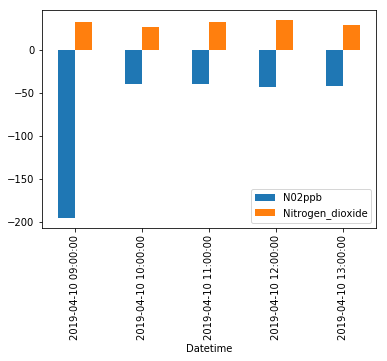

In [159]:
Validation_NO2.plot(x="Datetime", y=['N02ppb','Nitrogen_dioxide'], kind="bar")

In [161]:
Validation_SO2 = Validation[['Year','Month','Day','Hour',
                                 'S02ppb','Sulphur_dioxide','Datetime']]

In [172]:
Validation_SO2 = Validation_SO2[Validation_SO2.Sulphur_dioxide != 'No data']

In [173]:
Validation_SO2

,Year,Month,Day,Hour,S02ppb,Sulphur_dioxide,Datetime
0,2019,4,10,9,88.461538,0.26609,2019-04-10 09:00:00
2,2019,4,10,11,-0.093110,0.62088,2019-04-10 11:00:00


In [174]:
Validation_SO2['Sulphur_dioxide'] = Validation_SO2.Sulphur_dioxide.astype('float64')

/Users/annalisasheehan/anaconda/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


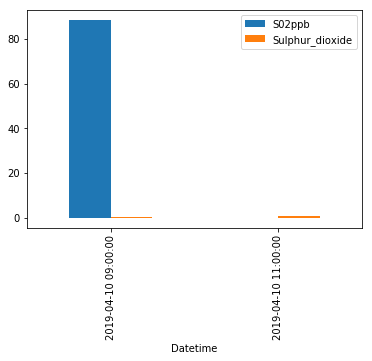

In [175]:
Validation_SO2.plot(x="Datetime", y=['S02ppb','Sulphur_dioxide'], kind="bar")

In [ ]:
# Plot data
fig = plt.figure(); ax= fig.add_subplot(1,1,1)#; plt.ylim([0,100])
ax.plot(Arduino6.Datetime.astype('O') ,Arduino6.ppb, color='b',label = 'SO2')


In [5]:
Arduino6.to_csv('Ard6.csv')

In [20]:
Arduino9 = pd.read_csv("After Calibration/cr_sensor_9_calib.txt",delimiter=',',
                       names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds','CO2','?'])

In [21]:
Arduino9

,Year,Month,Day,Hour,Minute,Seconds,CO2,?
0,2019,3,11,15,4,30,0.61,648.44
1,2019,3,11,15,4,35,0.61,657.42
2,2019,3,11,15,4,40,0.61,651.56
3,2019,3,11,15,4,45,0.61,659.96
4,2019,3,11,15,4,50,0.62,673.44
5,2019,3,11,15,4,57,0.62,691.41
6,2019,3,11,15,5,2,0.62,698.44
7,2019,3,11,15,5,11,0.62,690.63
8,2019,3,13,13,9,46,1.23,2602.93
9,2019,3,13,13,9,51,1.33,2920.12


In [7]:
Arduino10 = pd.read_csv("After Calibration/cr_sensor_10_calib.txt",delimiter=',',
                        names=['Year','Month','Day', 'Hour', 'Minute', 'Seconds','CO_1','CO_2','NO2_1','NO2_2'])

In [23]:
Arduino10

,Year,Month,Day,Hour,Minute,Seconds,V0,V1,V2,V3
0,2019,11,3,15,14,29,0.27,0.28,0.29,0.29
1,2019,11,3,15,14,34,0.27,0.28,0.29,0.30
2,1900,1,1,0,0,7,0.04,0.28,0.04,0.00
3,1900,1,1,0,0,12,0.04,0.28,0.04,-0.00
4,1900,1,1,0,0,6,0.04,0.28,0.04,-0.00
5,1900,1,1,0,0,11,0.04,0.28,0.04,-0.00
6,1900,1,1,0,0,16,0.04,0.28,0.15,0.08
7,1900,1,1,0,0,21,0.04,0.28,0.20,0.10
8,1900,1,1,0,0,26,0.04,0.28,0.22,0.17
9,1900,1,1,0,0,31,0.04,0.28,0.24,0.18
